In [1]:
import os
import matplotlib.pyplot as plt
import keras
import numpy as np
import pickle
import cv2
import random


In [2]:
DIRECTORY=r'D:\ML workshop\ImageClassifier\dogscats\dataset'
CATEGORIES=['cats','dogs']

In [3]:
IMG_SIZE=100
data=[]
for category in CATEGORIES:
    folder=os.path.join(DIRECTORY,category)
    label=CATEGORIES.index(category)
    for img in os.listdir(folder):
        img_path=os.path.join(folder,img)
        img_arr=cv2.imread(img_path)
        img_arr=cv2.resize(img_arr,(IMG_SIZE,IMG_SIZE))
        data.append([img_arr,label])
        

In [4]:
len(data)

23000

In [5]:
random.shuffle(data)

In [6]:
X=[]
Y=[]

for features,label in data:
    X.append(features)
    Y.append(label)

In [7]:

X=np.array(X)
Y=np.array(Y)

In [8]:
X=X/225

In [9]:
X.shape


(23000, 100, 100, 3)

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [11]:
model=Sequential()
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(128,input_shape=X.shape[1:],activation='relu'))
model.add(Dense(2,activation = 'softmax'))


In [12]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:

model.fit(X,Y,epochs=5,validation_split=0.1)

Epoch 1/5
647/647 [==============================] - 2126s 3s/step - loss: 0.6547 - accuracy: 0.6161 - val_loss: 0.6395 - val_accuracy: 0.6439
Epoch 2/5
647/647 [==============================] - 1243s 2s/step - loss: 0.5622 - accuracy: 0.7103 - val_loss: 0.5407 - val_accuracy: 0.7300
Epoch 3/5
647/647 [==============================] - 1216s 2s/step - loss: 0.4508 - accuracy: 0.7871 - val_loss: 0.5487 - val_accuracy: 0.7374
Epoch 4/5
647/647 [==============================] - 26873s 42s/step - loss: 0.3248 - accuracy: 0.8571 - val_loss: 0.5573 - val_accuracy: 0.7517
Epoch 5/5
647/647 [==============================] - 1273s 2s/step - loss: 0.1739 - accuracy: 0.9334 - val_loss: 0.6909 - val_accuracy: 0.7600


Image is of a cat


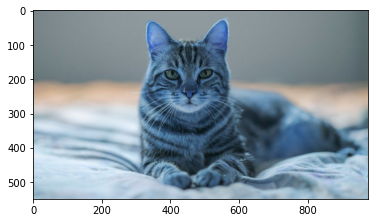

In [17]:
test_image=cv2.imread('image.png')
show_img=test_image
test_image=cv2.resize(test_image,(100,100))
test_image=test_image.reshape(1,100,100,3)
result=model.predict(test_image)
if(result[0][0]==1):
    print("Image is of a cat")
else:
    print("Image is of a dog")
    show_img=cv2.cvtColor(show_img,cv2.COLOR_BGR2RGB)
plt.imshow(show_img)
